<h1 align="center"> Assignment 3 </h1>

Link to runnable .ipynb file: https://github.com/Vortriz/MTH407/blob/main/labs/3/lab3.ipynb

In [1]:
using Plots
using LaTeXStrings

### 1. Plot various functions that are studied in the notes on Asymptotic analysis in order to compare their asymptotic behaviour.

In [2]:
c = 1.2

1.2

In [3]:
f₁(x) = log(10, log(10, x))^c
f₂(x) = log(10, x)^c
f₃(x) = x^c
f₄(x) = c^x

f₄ (generic function with 1 method)

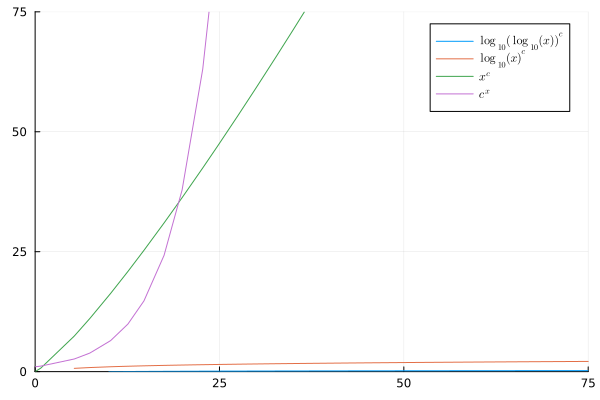

In [4]:
plot(xlims = (0, 75), ylims = (0, 75))
plot!(f₁, label=L"\log_{10}(\log_{10}(x))^c")
plot!(f₂, label=L"\log_{10}(x)^c")
plot!(f₃, label=L"x^c")
plot!(f₄, label=L"c^x")

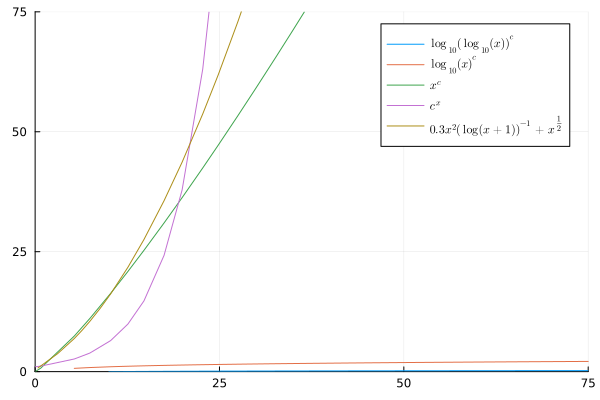

In [5]:
f′(x) = 0.3 * x^2 * (log(x+1))^-1 + x^0.5
plot!(f′, label=L"0.3 x^2 (\log(x+1))^{-1} + x^{\frac{1}{2}}")

### 2. Implement the GCD algorithm and examine its time complexity using counting of iterations. Compare this with execution time.

In [6]:
function gcd_rec(m, n)
    if m < n
        return gcd_rec(n, m)
    elseif n > 0
        q = m ÷ n
        r = m % n
        return gcd_rec(n, r)
    else
        return m
    end
end

gcd_rec (generic function with 1 method)

In [7]:
gcd_rec(12, 16)

4

In [ ]:
function gcd_loop(m, n)
    m′ = copy(m)
    n′ = copy(n)

    if m′ < n′
        m′, n′ = n′, m′
    end

    global count_div = 0

    while n′ > 0
        r = m′ % n′
        m′, n′ = n′, r

        count_div += 1
    end

    return m′
end

gcd_loop (generic function with 1 method)

In [9]:
gcd_loop(12, 16)

4

In [ ]:
function fibonacci(n)
    if n <= 0
        return 0
    elseif n == 1
        return 1
    else
        a, b = Int128(0), Int128(1)
        for i in 2:n
            a, b = b, a + b
        end
        return b
    end
end

fib_list = [fibonacci(i) for i in 1:100]
println(fib_list)

Signed[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008

#### 2.1 For consecutive Fibonacci numbers

In [40]:
counts = []
time_gcd = []

for i in 1:99
    time = @elapsed gcd_loop(fib_list[i], fib_list[i+1])
    push!(counts, count_div)
    push!(time_gcd, time)
end

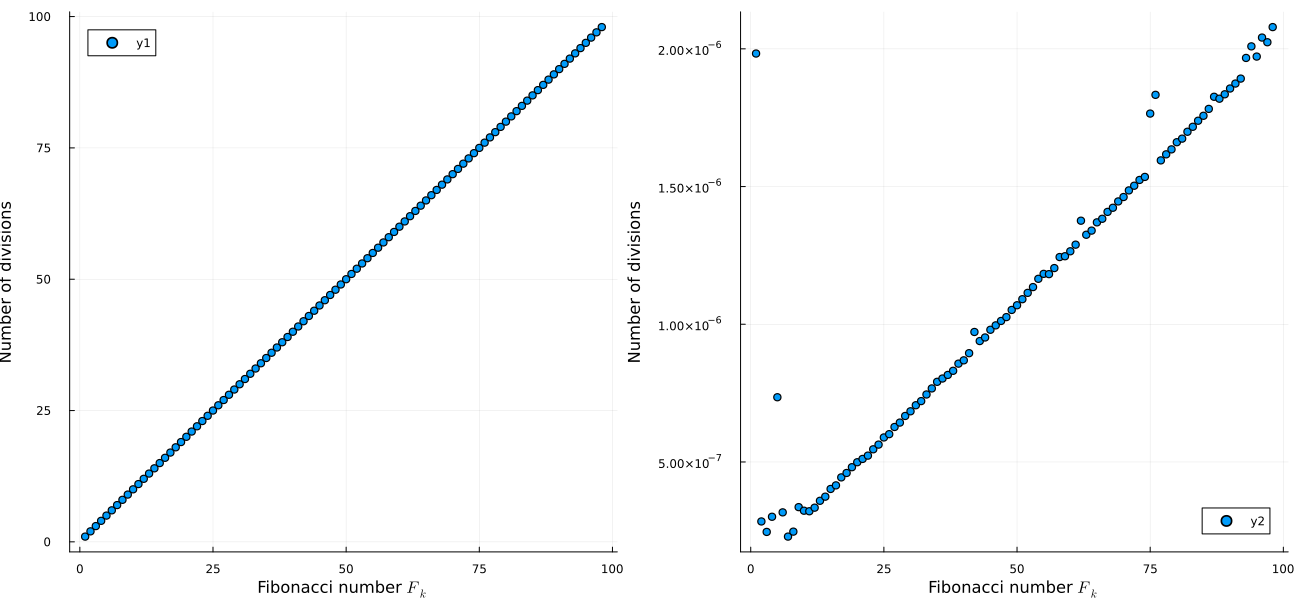

In [44]:
scatter([counts[2:end] time_gcd[2:end]],
    layout = (1, 2), size=(1300, 600),
    xlabel=L"Fibonacci number $F_{k}$"*"\n", ylabel="\nNumber of divisions")

#### 2.2 For random numbers of same length

In [46]:
counts = []
time_gcd = []

for i in 1:37
    m, n = rand(Int128(10)^i:Int128(10)^(i+1)), rand(Int128(10)^i:Int128(10)^(i+1))
    time = @elapsed gcd_loop(m, n)
    push!(counts, count_div)
    push!(time_gcd, time)
end

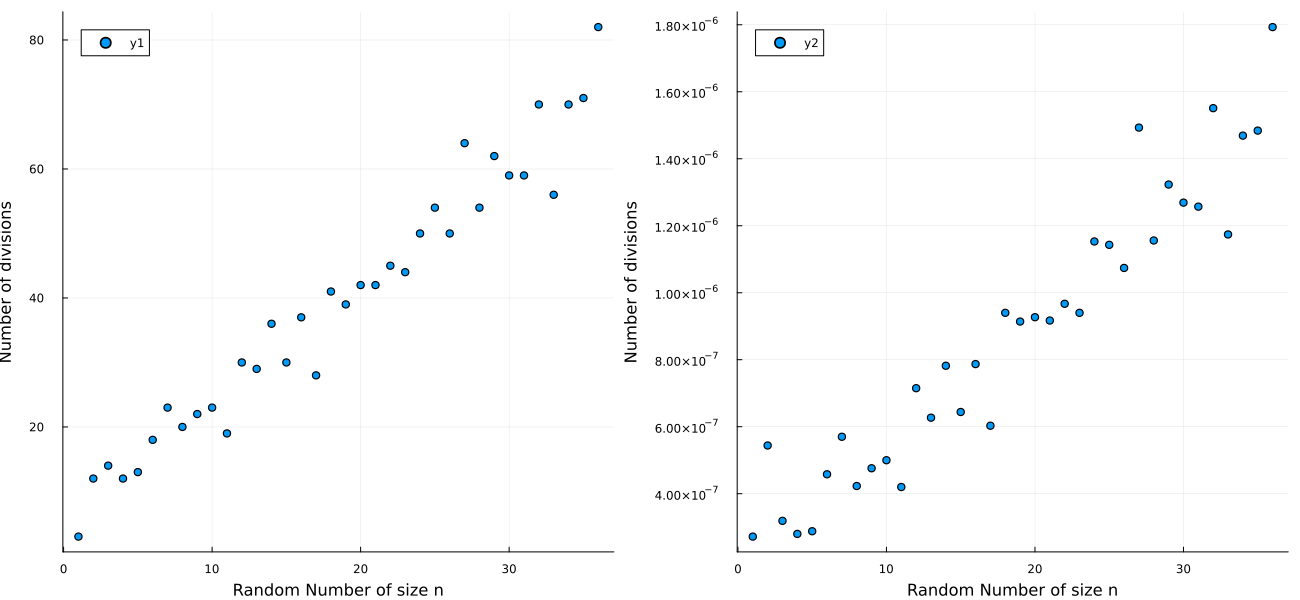

In [47]:
scatter([counts[2:end] time_gcd[2:end]],
    layout = (1, 2), size=(1300, 600),
    xlabel="Random Number of size n\n", ylabel="\nNumber of divisions")